In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
epochs = 100
fold   = 10
path = 'log/'

command = "mkdir "+path+"csv"
os.system(command)

filenames = os.listdir(path)
filenames = np.sort(filenames)

flist = [] 
for filename in filenames:
    if ".txt" in filename.lower():
        flist.append(os.path.join(filename))

for i in range(len(flist)):
    print flist[i]

log_old_batch_norm.txt
log_old_batch_norm_noise001.txt
log_old_batch_norm_noise005.txt


save : log/csv/log_old_batch_norm.csv
Max R^2 =  [ 0.77334]
Epoch   =  14




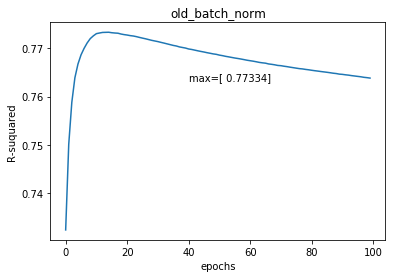

save : log/csv/log_old_batch_norm_noise001.csv
Max R^2 =  [ 0.7727]
Epoch   =  11




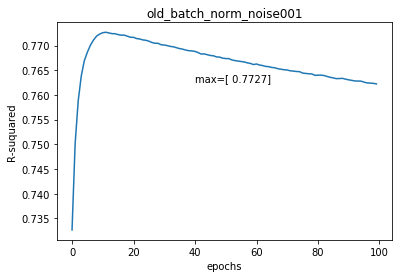

save : log/csv/log_old_batch_norm_noise005.csv
Max R^2 =  [ 0.77375]
Epoch   =  23




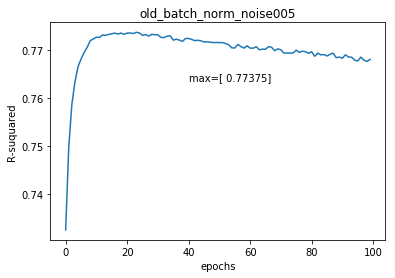

In [10]:
error_flag = False
for i in range(len(flist)):
    f = open(path+flist[i])

    r2     = np.ndarray(shape=(epochs,fold), dtype = np.float)
    t_loss = np.ndarray(shape=(epochs,fold), dtype = np.float)
    v_loss = np.ndarray(shape=(epochs,fold), dtype = np.float)
    lr_rate = np.ndarray(shape=(epochs,fold), dtype = np.float)
    

    for _fd in range(fold):
        aline = f.readline()

        if aline.split(' ')[0] != 'fold' :
            error_flag = True
            print flist[i], i
            print "Error in Fold"
            break

        for epoch in range(epochs) :

            aline = f.readline()

            if aline.split(' ')[0] != 'Epoch':
                error_flag = True
                print "Error in Epoch"
                break

            r2    [epoch, _fd] = float(aline.split('|')[1].split(':')[1])
            t_loss[epoch, _fd] = float(aline.split('|')[2].split(':')[1])
            v_loss[epoch, _fd] = float(aline.split('|')[3].split(':')[1])
            lr_rate[epoch, _fd] = float(aline.split('|')[4].split(':')[1].split('\n')[0])
            
    if error_flag == False :
        r2     = np.mean(r2    , 1).reshape(epochs, 1)
        t_loss = np.mean(t_loss, 1).reshape(epochs, 1)
        v_loss = np.mean(v_loss, 1).reshape(epochs, 1)

        csv_filename = flist[i].split('.')[0]
        np.savetxt(path+'csv/'+csv_filename+'.csv', np.hstack((r2,t_loss, v_loss)), delimiter=',')
        print "save : "+path+'csv/'+csv_filename+'.csv'
        print "Max R^2 = ", r2[np.argmax(r2)]
        print "Epoch   = ", np.argmax(r2)
        print "\n"
        
        plt.title(flist[i][4:-4])
        plt.plot(r2)
        plt.xlabel('epochs')
        plt.ylabel('R-suquared')
        plt.text(40,(r2[np.argmax(r2)]-0.01),'max={}'.format(r2[np.argmax(r2)]))
        plt.savefig('logfig/'+flist[i][4:-4]+'.png')
        plt.show()

    f.close()